In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import xarray as xr
from xmip.preprocessing import rename_cmip6
matplotlib.rcParams.update({'font.size': 14})


In [12]:
DF = pd.read_csv('int_outs/Pr_CO2_main_df_out.csv')
DF_landsea = pd.read_csv('int_outs/landsearatio_main_out_df.csv')

In [13]:
cpal = {'2xCO2':'red',
        '1pctCO2':'blue',
        'PI':'black'}

piCO2 = 284.3 # ppm, Meishausen 2017 - https://gmd.copernicus.org/articles/10/2057/2017/gmd-10-2057-2017.html

Double_CO2 =  piCO2*2

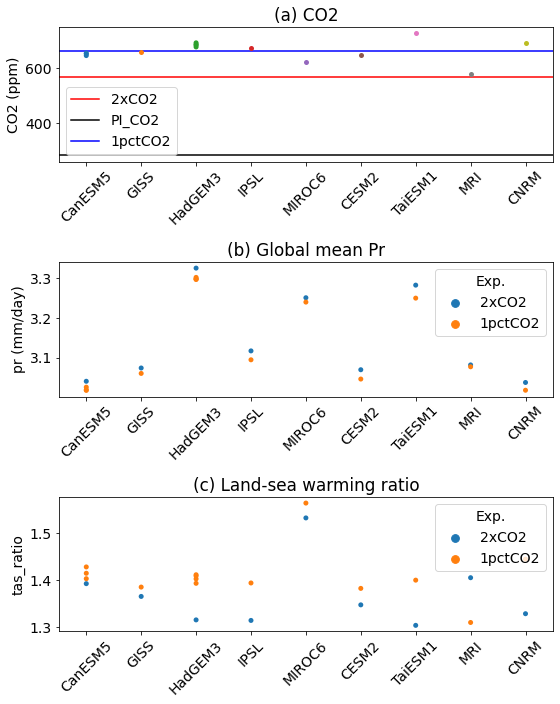

In [25]:
fig, axs = plt.subplots(3, 1, figsize=(8, 10))


ax = axs[0]
trans_CO2 = np.mean(DF[DF['Exp.']=='1pctCO2']["CO2 (ppm)"])
sns.stripplot(ax=ax, data=DF[DF['Exp.']=='1pctCO2'], x="Model_short", 
              y="CO2 (ppm)", c=cpal['1pctCO2'], jitter=False)

ax.set_xlabel('')
ax.set_title('(a) CO2', fontsize='large')
ax.axhline(Double_CO2, c=cpal['2xCO2'], label='2xCO2')
ax.axhline(piCO2, c=cpal['PI'], label='PI_CO2')
ax.axhline(trans_CO2, label='1pctCO2',
           c=cpal['1pctCO2'])
ax.legend()
ax.tick_params(axis='x', labelrotation=45)


ax = axs[1]
sns.stripplot(ax=ax, data=DF, x="Model_short", y="pr (mm/day)", hue="Exp.", jitter=False)
ax.set_xlabel('')
ax.set_title('(b) Global mean Pr', fontsize='large')
ax.tick_params(axis='x', labelrotation=45)

ax = axs[2]
sns.stripplot(ax=ax, data=DF_landsea, x="Model_short", y="tas_ratio", hue="Exp.", jitter=False)
ax.set_xlabel('')
ax.set_title('(c) Land-sea warming ratio', fontsize='large')
ax.tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.savefig('Figures/Effect_sizes_overview_by_model.jpg', dpi=400)

In [15]:
DF['pr (mm/day)'] = DF['pr (mm/day)'].astype(float)
df_means = pd.merge(DF.groupby(['Model', 'Exp.']).mean().reset_index(), 
                    DF_landsea.groupby(['Model', 'Exp.']).mean().reset_index(),
                    on=['Model', 'Exp.'], how='inner')

In [16]:
deltass = []
for mod in df_means.Model.unique():
    vars = ['CO2 (ppm)', 'pr (mm/day)', 'tas_ratio']
    df_mod = df_means[df_means['Model']==mod]
    deltas = (df_mod[df_mod['Exp.']=='2xCO2'][vars].reset_index() - df_mod[df_mod['Exp.']=='1pctCO2'][vars].reset_index())
    deltas['Model']=mod
    deltass.append(deltas)
    deltas_df = pd.concat(deltass).reset_index() 

deltas_df

,level_0,index,CO2 (ppm),pr (mm/day),tas_ratio,Model
0,0,1,-77.390436,0.023378,-0.034986,CESM2
1,0,1,-121.212695,0.019458,-0.115926,CNRM-CM6-1
2,0,1,-81.384201,0.019641,-0.022693,CanESM5
3,0,1,-87.928174,0.013608,-0.019875,GISS-E2-1-H
4,0,1,-115.162183,0.026519,-0.088501,HadGEM3-GC31-LL
5,0,1,-104.274691,0.022329,-0.079579,IPSL-CM6A-LR
6,0,1,-51.509467,0.010936,-0.031524,MIROC6
7,0,1,-10.925804,0.004668,0.095103,MRI-ESM2-0
8,0,1,-157.398083,0.032590,-0.096008,TaiESM1


In [17]:
# also get hadgem:
df_hadgem = DF[DF['Model']=='HadGEM3-GC31-LL']
df_ls_hadgem = DF_landsea[DF_landsea['Model']=='HadGEM3-GC31-LL']

pr_2xCO2 = df_hadgem[df_hadgem['Exp.']=='2xCO2']['pr (mm/day)'].item()
pr_1pctCO2 = df_hadgem[df_hadgem['Exp.']=='1pctCO2']['pr (mm/day)']
deltas_pr_hadgem = pr_2xCO2 - pr_1pctCO2

CO2_2xCO2 = df_hadgem[df_hadgem['Exp.']=='2xCO2']['CO2 (ppm)'].item()
CO2_1pctCO2 = df_hadgem[df_hadgem['Exp.']=='1pctCO2']['CO2 (ppm)']
deltas_CO2_hadgem = CO2_2xCO2 - CO2_1pctCO2

LSR_2xCO2 = df_ls_hadgem[df_ls_hadgem['Exp.']=='2xCO2']['tas_ratio'].item()
LSR_1pctCO2 = df_ls_hadgem[df_ls_hadgem['Exp.']=='1pctCO2']['tas_ratio']
deltas_LSR_hadgem = LSR_2xCO2 - LSR_1pctCO2


In [53]:
df_hadgem

,Unnamed: 0,Model,Exp.,pr,CO2 (ppm),pr (mm/day),Model_short
6,0,HadGEM3-GC31-LL,2xCO2,0.000038,568.600000,3.324757,HadGEM3
7,0,HadGEM3-GC31-LL,1pctCO2,0.000038,690.989030,3.298318,HadGEM3
8,1,HadGEM3-GC31-LL,1pctCO2,0.000038,685.176269,3.296566,HadGEM3
9,2,HadGEM3-GC31-LL,1pctCO2,0.000038,676.225286,3.301483,HadGEM3
10,3,HadGEM3-GC31-LL,1pctCO2,0.000038,682.658149,3.296585,HadGEM3


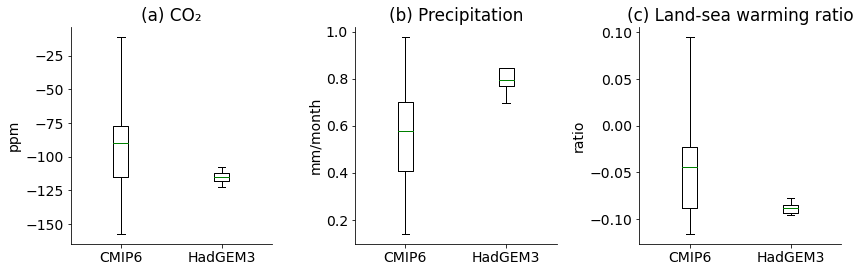

In [100]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

labs = ['CMIP6', 'HadGEM3']

ax = axs[0]
ax.set_title('(a) CO\u2082')
ax.boxplot([deltas_df['CO2 (ppm)'], deltas_CO2_hadgem], 
           labels=labs,
           whis=[0, 100], 
           showmeans=True, meanline=True,
           flierprops = dict(marker = "x"),
           medianprops = dict(color = "orange", linewidth = 0),
           meanprops = dict(color = "green", linewidth = 1, ls='solid')
           )
ax.set_ylabel('ppm')

ax = axs[1]
ax.set_title('(b) Precipitation')
ax.boxplot([30*deltas_df['pr (mm/day)'], 30*deltas_pr_hadgem], 
           labels=labs,
           whis=[0, 100], 
           showmeans=True, meanline=True,
           flierprops = dict(marker = "x"),
           medianprops = dict(color = "orange", linewidth = 0),
           meanprops = dict(color = "green", linewidth = 1, ls='solid')
           )
ax.set_ylabel('mm/month')

ax = axs[2]
ax.set_title('(c) Land-sea warming ratio')
ax.boxplot([deltas_df['tas_ratio'], deltas_LSR_hadgem], 
           labels=labs,
           whis=[0, 100], 
           showmeans=True, meanline=True,
           flierprops = dict(marker = "x"),
           medianprops = dict(color = "orange", linewidth = 0),
           meanprops = dict(color = "green", linewidth = 1, ls='solid')
           )
ax.set_ylabel('ratio')


for ax in axs:
    ax.spines[['right', 'top']].set_visible(False)
plt.tight_layout()
plt.savefig('Figures/Effect_sizes_boxes.jpg', dpi=350)
plt.show()

In [19]:
# do timeseries plots for hadgem only for now:
mod = 'HadGEM3-GC31-LL'
with open('int_outs/{}_dict.pickle'.format(mod), 'rb') as handle:
    d = pickle.load(handle)
with open('int_outs/{}_LS_dict.pickle'.format(mod), 'rb') as handle:
    d_ls = pickle.load(handle)
# also get PI rainfall for HadGEM:
def get_pi(model, var='tas'):
    dir_pi = glob.glob('/badc/cmip6/data/CMIP6/*/*/{m}/piControl/r1i*/Amon/{v}/*/latest/'.format(m=model, v=var))
    files_pi = os.listdir(dir_pi[0])[0:3] # don't need the full length run
    paths_pi = []
    for x in files_pi:
        paths_pi.append(dir_pi[0]+x)
    da_pi = rename_cmip6(xr.open_mfdataset(paths_pi))[var].mean(dim='x')
    da_pi = da_pi.weighted(weights=np.cos(np.deg2rad(da_pi.y))).mean(dim='y')
    
    gmst_pi = da_pi.mean(dim='time').values
    print(gmst_pi)
    return gmst_pi
pr_pi = get_pi(mod, var='pr')
unit_conversion = 86400

3.6250150155791426e-05


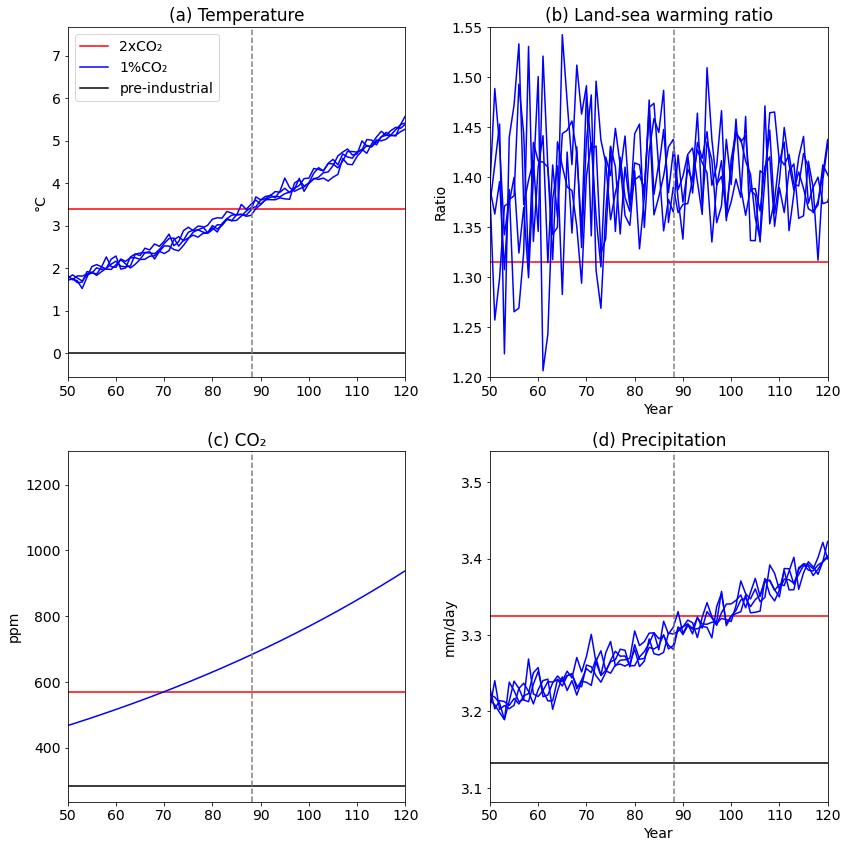

In [84]:
### OG version for rerference

trans_start_year_plots = 50

fig, axs = plt.subplots(2, 2, figsize=(12, 12))


ax = axs.flatten()[0]
ax.set_title('(a) Temperature')
ax.axhline(d['tas_stable'], c=cpal['2xCO2'], label='2xCO\u2082')
i=0
for ts in d['tas_ts_1pctCO2']:
    if i==0:
        ax.plot(ts, c=cpal['1pctCO2'], label='1%CO\u2082')
    else:
        ax.plot(ts, c=cpal['1pctCO2'])
    i=i+1
ax.axhline(0, c=cpal['PI'], label='pre-industrial')        
ax.set_ylabel('°C')
ax.legend(loc=2)

ax = axs.flatten()[2]
ax.set_title('(c) CO\u2082')
ax.axhline(Double_CO2, c=cpal['2xCO2'])
ax.axhline(piCO2, c=cpal['PI'])
ts = d['CO2_ts_1pctCO2']
ax.plot(ts, c=cpal['1pctCO2'])
ax.set_ylabel('ppm')


ax = axs.flatten()[3]
ax.set_title('(d) Precipitation')
ax.axhline(d['pr_stable']*unit_conversion, c=cpal['2xCO2'])
ax.axhline(pr_pi*unit_conversion, c=cpal['PI'])
for ts in d['pr_ts_1pctCO2']:
    ax.plot(ts*unit_conversion, c=cpal['1pctCO2'])
ax.set_ylabel('mm/day')
ax.set_xlabel('Year')


ax = axs.flatten()[1]
ax.set_title('(b) Land-sea warming ratio')
ratio = d_ls['tas_land_stable']/d_ls['tas_ocean_stable']
ax.axhline(ratio, c=cpal['2xCO2'])
for i in range(len(d_ls['tas_global_ts'])):
    land = d_ls['tas_land_ts'][i]
    ocean = d_ls['tas_ocean_ts'][i]
    ts = land/ocean
    ax.plot(ts, c=cpal['1pctCO2'])
ratios = []
for i in range(len(d_ls['tas_land_at_crossing_years'])):
    land = d_ls['tas_land_at_crossing_years'][i]
    ocean = d_ls['tas_ocean_at_crossing_years'][i]
    ratios.append(land/ocean)
trans_ratio = np.mean(ratios)
ax.set_ylabel('Ratio')
ax.set_xlabel('Year')
ax.set_ylim(1.2, 1.55)


for ax in axs.flatten():
    ax.axvline(np.mean(d['Crossing_years']) - d['Year_0_1pctCO2'], ls='--', c='gray')
    ax.set_xlim(trans_start_year_plots, 120)
#plt.suptitle(mods_to_run[2])
plt.tight_layout()
plt.savefig('Figures/timeseries_deltas_OG.jpg', dpi=350)


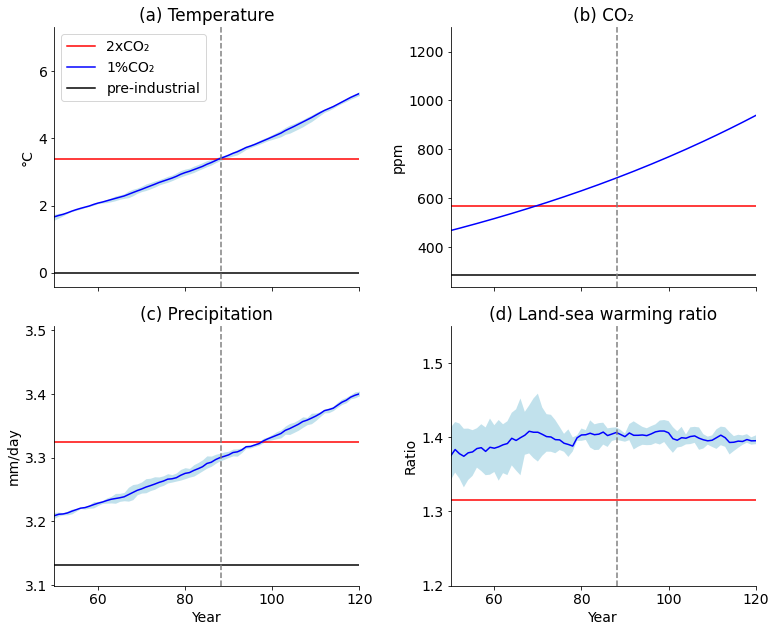

In [99]:
### New version with smoothed lines 10/04/2024

trans_start_year_plots = 50

fig, axs = plt.subplots(2, 2, figsize=(11, 9), sharex='col')


ax = axs.flatten()[0]
ax.set_title('(a) Temperature')
ax.axhline(d['tas_stable'], c=cpal['2xCO2'], label='2xCO\u2082')
i=0
dfs = []
for ts in d['tas_ts_1pctCO2']:
    df = pd.DataFrame({'tas_{}'.format(i):ts})
    dfs.append(df.rolling(10, center=True).mean())
    i=i+1
df_tas = pd.concat(dfs, axis=1)
df_tas["max"] = df_tas.max(axis=1)
df_tas["min"] = df_tas.min(axis=1)
df_tas["mean"] = df_tas.mean(axis=1)
ax.plot(df_tas.index.values, df_tas["mean"], c=cpal['1pctCO2'], label='1%CO\u2082')    
ax.fill_between(df_tas.index.values, df_tas["min"], df_tas["max"], 
                alpha=0.75, color='lightblue', linewidth=0)
     
ax.axhline(0, c=cpal['PI'], label='pre-industrial')        
ax.set_ylabel('°C')
ax.legend(loc=2)
ax.set_yticks([0, 2, 4, 6])

ax = axs.flatten()[1]
ax.set_title('(b) CO\u2082')
ax.axhline(Double_CO2, c=cpal['2xCO2'])
ax.axhline(piCO2, c=cpal['PI'])
ts = d['CO2_ts_1pctCO2']
ax.plot(ts, c=cpal['1pctCO2'])
ax.set_ylabel('ppm')


ax = axs.flatten()[2]
ax.set_title('(c) Precipitation')
ax.axhline(d['pr_stable']*unit_conversion, c=cpal['2xCO2'])
ax.axhline(pr_pi*unit_conversion, c=cpal['PI'])

i=0
dfs = []
for ts in d['pr_ts_1pctCO2']:
    df = pd.DataFrame({'pr_{}'.format(i):ts})
    dfs.append(df.rolling(10, center=True).mean())
    i=i+1
df_pr = pd.concat(dfs, axis=1)
df_pr["max"] = df_pr.max(axis=1)
df_pr["min"] = df_pr.min(axis=1)
df_pr["mean"] = df_pr.mean(axis=1)
ax.plot(df_pr.index.values, df_pr["mean"]*unit_conversion, c=cpal['1pctCO2'])    
ax.fill_between(df_pr.index.values, df_pr["min"]*unit_conversion,
                df_pr["max"]*unit_conversion, 
                alpha=.75, color='lightblue', linewidth=0)
ax.set_ylabel('mm/day')
ax.set_xlabel('Year')
ax.set_xticks([60, 80, 100, 120])
ax.set_yticks([3.1, 3.2, 3.3, 3.4, 3.5])


ax = axs.flatten()[3]
ax.set_title('(d) Land-sea warming ratio')
ratio = d_ls['tas_land_stable']/d_ls['tas_ocean_stable']
ax.axhline(ratio, c=cpal['2xCO2'])

dfs = []
for i in range(len(d_ls['tas_global_ts'])):
    land = d_ls['tas_land_ts'][i]
    ocean = d_ls['tas_ocean_ts'][i]
    ts = land/ocean
    df = pd.DataFrame({'LSR_{}'.format(i):ts})
    dfs.append(df.rolling(10, center=True).mean())
df_LSR = pd.concat(dfs, axis=1)
df_LSR["max"] = df_LSR.max(axis=1)
df_LSR["min"] = df_LSR.min(axis=1)
df_LSR["mean"] = df_LSR.mean(axis=1)
ax.plot(df_LSR.index.values, df_LSR["mean"], c=cpal['1pctCO2'])    
ax.fill_between(df_LSR.index.values, df_LSR["min"], df_LSR["max"], 
                alpha=.75, color='lightblue', linewidth=0)

ratios = []
for i in range(len(d_ls['tas_land_at_crossing_years'])):
    land = d_ls['tas_land_at_crossing_years'][i]
    ocean = d_ls['tas_ocean_at_crossing_years'][i]
    ratios.append(land/ocean)
trans_ratio = np.mean(ratios)

ax.set_ylabel('Ratio')
ax.set_xlabel('Year')
ax.set_ylim(1.2, 1.55)
ax.set_xticks([60, 80, 100, 120])
ax.set_yticks([1.2, 1.3, 1.4, 1.5])

for ax in axs.flatten():
    ax.axvline(np.mean(d['Crossing_years']) - d['Year_0_1pctCO2'], ls='--', c='gray')
    ax.set_xlim(trans_start_year_plots, 120)
    ax.spines[['right', 'top']].set_visible(False)
#plt.suptitle(mods_to_run[2])
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.savefig('Figures/timeseries_deltas_rolling_means.jpg', dpi=350)
